Prima si Formatta poi si Crea!!

# Time Series Creator


In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
#from timeseries_writer import *
from geoframepy.timeseries import io_csv

oms_project_path = os.path.dirname(os.getcwd())
oms_project_path

'C:\\Users\\super\\OMS_Project_WHETGEO1D_Idrologia_ay_21_22'

In [2]:
project_name='E2_rain_intense.csv'

## Create Date Time Index

To create the timeseries it is possible to use the method `pandas.date_range()`

The timeseries can be specified by defining the start date `start` and the end date `end`, or the start date `start` and the number of periods `periods`.

The frequency is defined by `freq`:
- `D` daily;
- `H` hourly;
- `T` minutes;

In [3]:
date_rng = pd.date_range(start='01/01/2022 00:00', end='01/05/2022 00:00' , freq='1min')
date_rng

DatetimeIndex(['2022-01-01 00:00:00', '2022-01-01 00:01:00',
               '2022-01-01 00:02:00', '2022-01-01 00:03:00',
               '2022-01-01 00:04:00', '2022-01-01 00:05:00',
               '2022-01-01 00:06:00', '2022-01-01 00:07:00',
               '2022-01-01 00:08:00', '2022-01-01 00:09:00',
               ...
               '2022-01-04 23:51:00', '2022-01-04 23:52:00',
               '2022-01-04 23:53:00', '2022-01-04 23:54:00',
               '2022-01-04 23:55:00', '2022-01-04 23:56:00',
               '2022-01-04 23:57:00', '2022-01-04 23:58:00',
               '2022-01-04 23:59:00', '2022-01-05 00:00:00'],
              dtype='datetime64[ns]', length=5761, freq='T')

## Create data

In [4]:
d=len(date_rng)
dataframe = np.zeros(d)
#set the minimum value of time series m
m=0.05 #0.05
#set the maximum value of time series M
M=1 #0.2
for i in range(100,340):
    #create a time series with a costant value
    dataframe[i] = 0.9
    #
    #create a sinusoidal timeseries
    #dataframe[i] =(m+M)/2 + ((m+M)/2-m)*np.sin(8*np.pi/d*(i+1))

In [5]:
dfOut = pd.DataFrame(date_rng, columns=['date'])
dfOut['Value'] = dataframe
dfOut.insert(loc=0, column='0', value=np.nan)
dfOut.head()

,0,date,Value
0,NaN,2022-01-01 00:00:00,0.0
1,NaN,2022-01-01 00:01:00,0.0
2,NaN,2022-01-01 00:02:00,0.0
3,NaN,2022-01-01 00:03:00,0.0
4,NaN,2022-01-01 00:04:00,0.0


C:\Users\super\anaconda\envs\geoframe_verona\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  This is separate from the ipykernel package so we can avoid doing imports until


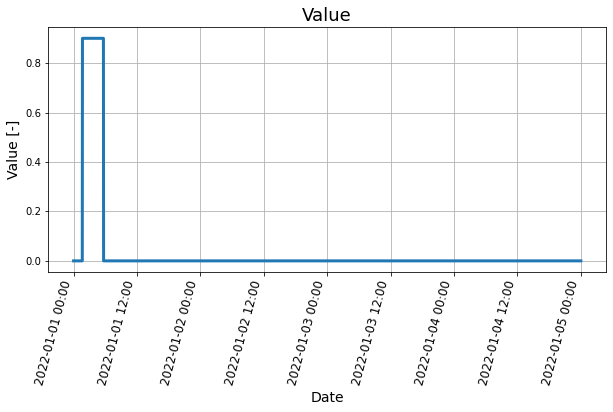

In [6]:
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)
plt.plot(dfOut['date'],dfOut['Value'], lineWidth =3)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Value [-]',fontsize=14)   
plt.title('Value',fontsize=18)
fig.autofmt_xdate()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
xlabels = ax.get_xticklabels()
ax.xaxis.get_major_ticks()
for label in xlabels:
    label.set_rotation(75)
    label.set_fontsize(12)
plt.grid()
plt.show()


In [7]:
dfOut

,0,date,Value
0,NaN,2022-01-01 00:00:00,0.0
1,NaN,2022-01-01 00:01:00,0.0
2,NaN,2022-01-01 00:02:00,0.0
3,NaN,2022-01-01 00:03:00,0.0
4,NaN,2022-01-01 00:04:00,0.0
...,...,...,...
5756,NaN,2022-01-04 23:56:00,0.0
5757,NaN,2022-01-04 23:57:00,0.0
5758,NaN,2022-01-04 23:58:00,0.0
5759,NaN,2022-01-04 23:59:00,0.0


In [8]:
dfOut.rename(columns={ dfOut.columns[1]: "0",dfOut.columns[2]:'0' }, inplace = True)

In [9]:
dfOut

,0,0,0
0,NaN,2022-01-01 00:00:00,0.0
1,NaN,2022-01-01 00:01:00,0.0
2,NaN,2022-01-01 00:02:00,0.0
3,NaN,2022-01-01 00:03:00,0.0
4,NaN,2022-01-01 00:04:00,0.0
...,...,...,...
5756,NaN,2022-01-04 23:56:00,0.0
5757,NaN,2022-01-04 23:57:00,0.0
5758,NaN,2022-01-04 23:58:00,0.0
5759,NaN,2022-01-04 23:59:00,0.0



# Save to a .csv file

### Ricordati di cambiare la **frequenza**

In [10]:
os.chdir(oms_project_path+"\\data\\Timeseries")
#os.listdir()

In [11]:
#write_timeseries_csv(dfOut,'E1_water_ponding.csv')

In [12]:
#from geoframepy.timeseries import io_csv

In [13]:
io_csv.write_OMS_timeseries(dfOut.iloc[:,2:], oms_project_path+'\\data\\Timeseries\\'+project_name, has_datetime=False, start_date='01-01-2022 00:00', frequency='1min')



***SUCCESS writing!  C:\Users\super\OMS_Project_WHETGEO1D_Idrologia_ay_21_22\data\Timeseries\E2_rain_intense.csv
